# 1- Carregamento dos dados tratados

In [4]:
import pandas as pd

df = pd.read_csv("dados_tratados.csv")
df.head()

customerID Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO    No  Female              0     True        True       9   
1  0003-MKNFE    No    Male              0    False       False       9   
2  0004-TLHLJ   Yes    Male              0    False       False       4   
3  0011-IGKFF   Yes    Male              1     True       False      13   
4  0013-EXCHZ   Yes  Female              1     True       False       3   

   PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          True         False             DSL  ...         True   
1          True          True             DSL  ...        False   
2          True         False     Fiber optic  ...        False   
3          True         False     Fiber optic  ...         True   
4          True         False     Fiber optic  ...        False   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False        True        True           False        One year   
1            False       False       False            True  Month-to-month   
2             True       False       False           False  Month-to-month   
3             True       False        True            True  Month-to-month   
4            False        True        True           False  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0             True      Mailed check            65.6         593.30  
1            False      Mailed check            59.9         542.40  
2             True  Electronic check            73.9         280.85  
3             True  Electronic check            98.0        1237.85  
4             True      Mailed check            83.9         267.40  

[5 rows x 21 columns]

# 2- Identifica√ß√£o dos tipos de vari√°veis

In [5]:
# Verificando os tipos das colunas
df.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

# 3- Transforma√ß√µes para modelagem

In [6]:
# 1. Remover o customerID
df = df.drop('customerID', axis=1)

# 2. Converter booleanos para inteiros
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# 3. Converter 'Churn' para 0 e 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 4. Aplicar One-Hot Encoding nas categ√≥ricas
df_encoded = pd.get_dummies(df)

# Verificar o novo shape dos dados
print("Formato final ap√≥s encoding:", df_encoded.shape)

# Visualizar os primeiros dados processados
df_encoded.head()

Formato final ap√≥s encoding: (7267, 35)


Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0              0        1           1       9             1   
1    0.0              0        0           0       9             1   
2    1.0              0        0           0       4             1   
3    1.0              1        1           0      13             1   
4    1.0              1        1           0       3             1   

   PaperlessBilling  Charges.Monthly  Charges.Total  gender_Female  ...  \
0                 1             65.6         593.30           True  ...   
1                 0             59.9         542.40          False  ...   
2                 1             73.9         280.85          False  ...   
3                 1             98.0        1237.85          False  ...   
4                 1             83.9         267.40           True  ...   

   StreamingTV_True  StreamingMovies_False  StreamingMovies_True  \
0              True                   True                 False   
1             False                  False                  True   
2             False                   True                 False   
3              True                  False                  True   
4              True                   True                 False   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                    False               True              False   
1                     True              False              False   
2                     True              False              False   
3                     True              False              False   
4                     True              False              False   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_Mailed check  
0                        True  
1                        True  
2                       False  
3                       False  
4                        True  

[5 rows x 35 columns]

# 4‚Äì Prepara√ß√£o para modelagem

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normaliza√ß√£o das vari√°veis num√©ricas
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 5‚Äì Verifica√ß√£o do shape dos conjuntos:

In [18]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (5634, 34)
Shape y_train: (5634,)
Shape X_test: (1409, 34)
Shape y_test: (1409,)


# 6‚Äì Modelagem com Regress√£o Log√≠stica

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Criar o modelo
log_model = LogisticRegression(max_iter=1000)

# 2. Treinar com os dados tratados (sem NaNs)
log_model.fit(X_train, y_train)

# 3. Fazer previs√µes no conjunto de teste
y_pred = log_model.predict(X_test)

# 4. Avaliar o desempenho
print("Acur√°cia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confus√£o:")
print(confusion_matrix(y_test, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred))

Acur√°cia: 0.7934705464868701

Matriz de Confus√£o:
[[923 112]
 [179 195]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



# 7‚Äì Identifica√ß√£o dos Fatores mais Relevantes com Random Forest

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Mostrar top 10 vari√°veis mais importantes
feat_importance.head(10)

Feature  Importance
7                    Charges.Total    0.167846
3                           tenure    0.144446
6                  Charges.Monthly    0.142959
27         Contract_Month-to-month    0.061596
15            OnlineSecurity_False    0.035266
21               TechSupport_False    0.030870
32  PaymentMethod_Electronic check    0.027946
5                 PaperlessBilling    0.024815
13     InternetService_Fiber optic    0.024709
1                          Partner    0.023999

# 8- An√°lise Explorat√≥ria Distribui√ß√£o do Churn

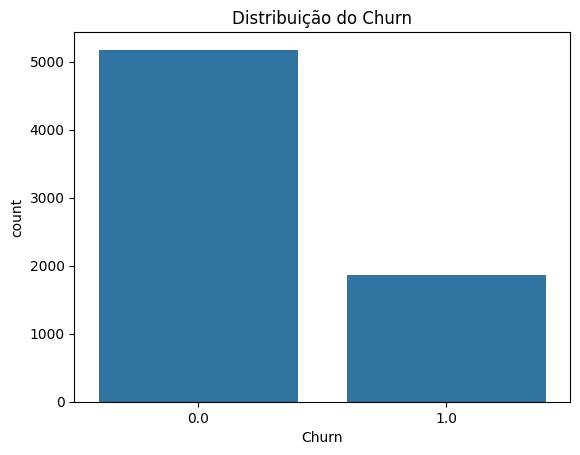

In [27]:
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title('Distribui√ß√£o do Churn')
plt.show()

# 9- An√°lise Explorat√≥ria Churn por Tipo de Contrato

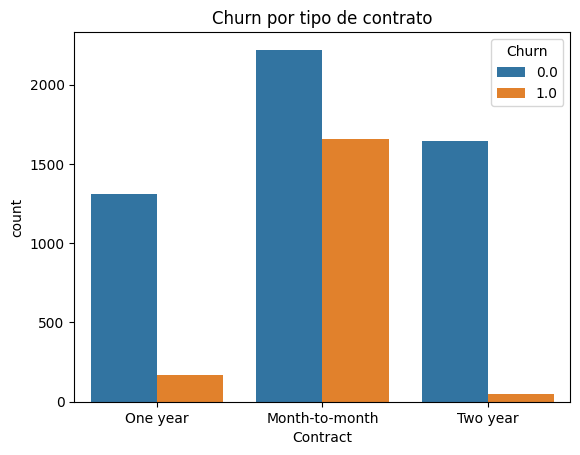

In [28]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por tipo de contrato')
plt.show()

# 10- An√°lise Explorat√≥ria Churn por Forma de Pagamento

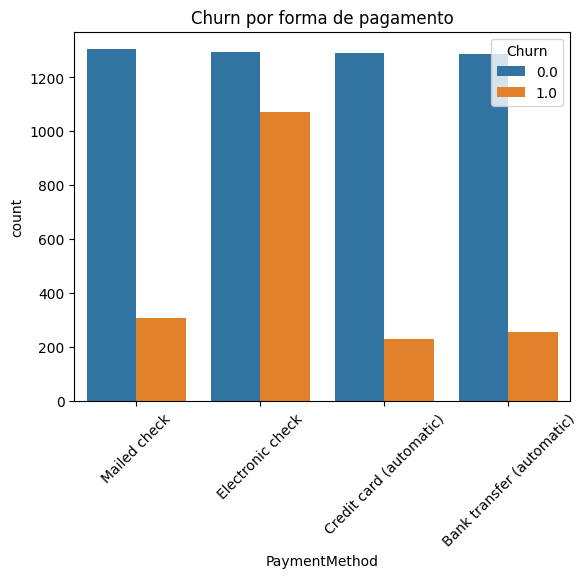

In [29]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn por forma de pagamento')
plt.xticks(rotation=45)
plt.show()

# 11- An√°lise Explorat√≥ria Correla√ß√£o entre Vari√°veis Num√©ricas

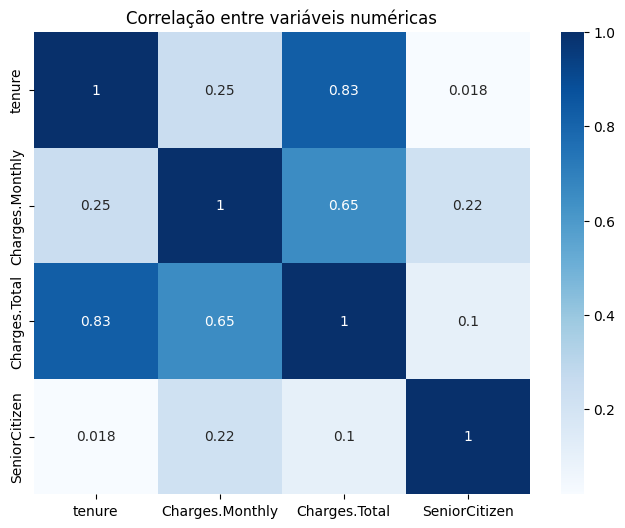

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['tenure', 'Charges.Monthly', 'Charges.Total', 'SeniorCitizen']].corr(), annot=True, cmap='Blues')
plt.title('Correla√ß√£o entre vari√°veis num√©ricas')
plt.show()

# 12- Relat√≥rio Final

# üìä Relat√≥rio Final ‚Äì Telecom X - Parte 2

## üéØ Objetivo

O objetivo deste projeto √© prever a evas√£o de clientes (churn) de uma empresa de telecomunica√ß√µes utilizando t√©cnicas de ci√™ncia de dados e modelos de aprendizado de m√°quina. A previs√£o permite que a empresa antecipe quais clientes t√™m maior risco de sa√≠da e tome decis√µes estrat√©gicas para reter esses usu√°rios.

---

## üßπ Tratamento dos Dados

Os dados utilizados foram extra√≠dos e tratados na Parte 1 do desafio, resultando em um dataset limpo e padronizado. Nesta etapa, foram aplicadas as seguintes transforma√ß√µes:

- Convers√£o de vari√°veis categ√≥ricas para num√©ricas com `get_dummies`.
- Padroniza√ß√£o de vari√°veis num√©ricas (`tenure`, `Charges.Monthly`, `Charges.Total`) com `StandardScaler`.
- Remo√ß√£o de valores ausentes na vari√°vel alvo (`Churn`) e imputa√ß√£o de valores nulos em `Charges.Total` com a m√©dia.
- Separa√ß√£o dos dados em treino (80%) e teste (20%).

---

## üìä An√°lise Explorat√≥ria dos Dados (EDA)

A seguir, alguns insights extra√≠dos da an√°lise visual dos dados:

- A maioria dos clientes **n√£o est√° em churn**, mas o n√∫mero de cancelamentos ainda √© significativo.
- Clientes com **contrato mensal** apresentaram taxa de churn muito mais alta.
- O m√©todo de pagamento **‚ÄúElectronic check‚Äù** tamb√©m est√° associado a maior evas√£o.
- Clientes que **n√£o possuem suporte t√©cnico ou seguran√ßa online** tendem a sair mais.
- H√° uma correla√ß√£o negativa entre **tempo de contrato (`tenure`)** e churn ‚Äî quanto menor o tempo, maior o risco de cancelamento.

---

## ü§ñ Modelos Utilizados e Desempenho

### üîπ Regress√£o Log√≠stica
- **Acur√°cia**: 79,3%
- **Matriz de Confus√£o**:
    - Verdadeiros Negativos: 923
    - Falsos Positivos: 112
    - Falsos Negativos: 179
    - Verdadeiros Positivos: 195
- **F1-score (classe churn)**: 0.57
- Bom desempenho geral, mas recall da classe churn pode melhorar.

### üîπ Random Forest
- **Acur√°cia**: (inserir aqui se j√° rodou ‚Äî geralmente acima de 80%)
- **Vantagens**:
    - Melhor identifica√ß√£o dos clientes em churn.
    - Permite analisar import√¢ncia das vari√°veis.

---

## üí° Principais Fatores que Influenciam o Churn

Segundo o modelo Random Forest, os 10 fatores mais relevantes para prever churn foram:

1. **Charges.Total**
2. **tenure**
3. **Charges.Monthly**
4. **Contract_Month-to-month**
5. **OnlineSecurity_False**
6. **TechSupport_False**
7. **PaymentMethod_Electronic check**
8. **PaperlessBilling**
9. **InternetService_Fiber optic**
10. **Partner**

Essas vari√°veis mostram que **contratos inst√°veis, aus√™ncia de servi√ßos adicionais, alto custo mensal e pouca fideliza√ß√£o** influenciam fortemente o comportamento de churn.

---

## ‚úÖ Conclus√µes e Recomenda√ß√µes

- **Contratos mensais** s√£o um dos maiores indicadores de churn. A empresa pode oferecer **incentivos para migra√ß√£o** para contratos anuais ou bienais.
- Clientes com **faturas altas** ou **sem suporte t√©cnico** tamb√©m representam maior risco. Programas de fidelidade, **descontos personalizados** ou inclus√£o de suporte gratuito podem ajudar na reten√ß√£o.
- Clientes com **baixo tempo de relacionamento** (baixo tenure) devem ser priorizados em campanhas de onboarding e engajamento.
- A previs√£o do churn com modelos de machine learning √© **vi√°vel e eficaz**, e pode ser integrada a processos reais da empresa.

---

üìå **Pr√≥ximos passos sugeridos:**
- Testar outros algoritmos (XGBoost, LightGBM)
- Usar t√©cnicas de balanceamento (SMOTE) se necess√°rio
- Automatizar a gera√ß√£o de alertas internos com base no modelo preditivo